<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
In this notebook, we will use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

We have downloaded a fuel consumption dataset **2019 Fuel Consumption Ratings (2019-11-05)** which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2019
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Note: I have done a little preprocessing of the dataset to make it read in Pandas Dataframe

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h1><center>Understanding the Dataset</center></h1>


In [4]:
df = pd.read_csv("FuelConsumption2019.csv")
df.head()

,Model_Year,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_ConsumptionCity,Fuel_ConsumptionHwy,Fuel_ConsumptionComb,FUELCONSUMPTION_COMB_MPG,CO2Emissions,CO2Rating,SMOG_Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [5]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_ConsumptionCity,Fuel_ConsumptionHwy,Fuel_ConsumptionComb,FUELCONSUMPTION_COMB_MPG,CO2Emissions,CO2Rating,SMOG_Rating
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378489,9.038432,10.871511,27.636711,251.311663,4.558317,4.136711
std,0.0,1.315989,1.796845,3.294506,2.049879,2.696681,7.314268,57.017603,1.651429,1.789777
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,23.000000,212.250000,3.000000,3.000000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,27.000000,248.000000,4.000000,5.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.500000,31.000000,289.000000,5.000000,5.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,69.000000,522.000000,10.000000,7.000000


In [6]:
cdf = df[['Engine_Size','Cylinders','Fuel_ConsumptionComb','CO2Emissions']]
cdf.head(9)

,Engine_Size,Cylinders,Fuel_ConsumptionComb,CO2Emissions
0,2.4,4,8.6,199
1,3.5,6,10.8,252
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,3.5,6,11.0,261
5,2.0,4,9.9,232
6,2.0,4,10.3,242
7,3.5,6,8.4,196
8,2.4,4,8.7,205


<h1><center>Dataset Exploration and Visualization</center></h1>

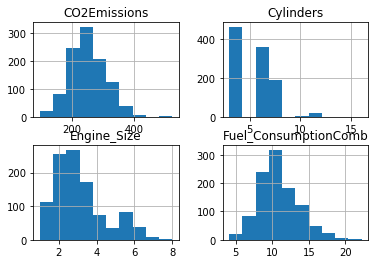

In [7]:
viz = cdf[['Engine_Size','Cylinders','Fuel_ConsumptionComb','CO2Emissions']]
viz.hist()
plt.show()

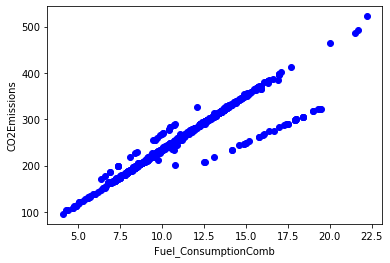

In [8]:
plt.scatter(cdf.Fuel_ConsumptionComb, cdf.CO2Emissions,  color='blue')
plt.xlabel("Fuel_ConsumptionComb")
plt.ylabel("CO2Emissions")
plt.show()

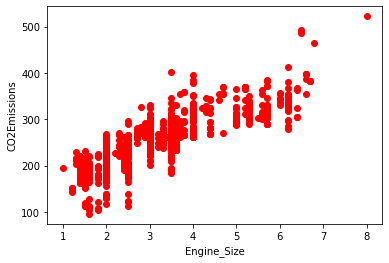

In [9]:
plt.scatter(cdf.Engine_Size, cdf.CO2Emissions,  color='red')
plt.xlabel("Engine_Size")
plt.ylabel("CO2Emissions")
plt.show()

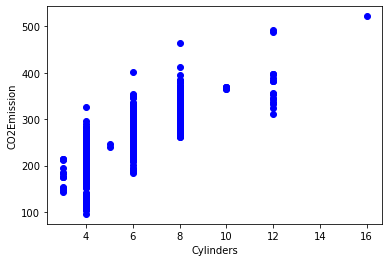

In [10]:
plt.scatter(cdf.Cylinders, cdf.CO2Emissions,  color = "blue")
plt.xlabel("Cylinders")
plt.ylabel("CO2Emission")
plt.show()

<h1><center>Simple Regression Model</center></h1>

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

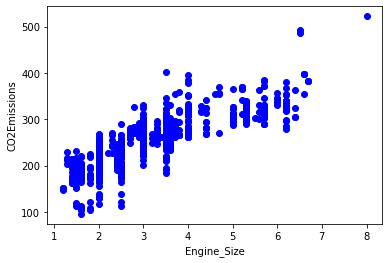

In [12]:
plt.scatter(train.Engine_Size, train.CO2Emissions,  color='blue')
plt.xlabel("Engine_Size")
plt.ylabel("CO2Emissions")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2Emissions']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[35.86543762]]
Intercept:  [139.48014907]


Text(0, 0.5, 'CO2Emissions')

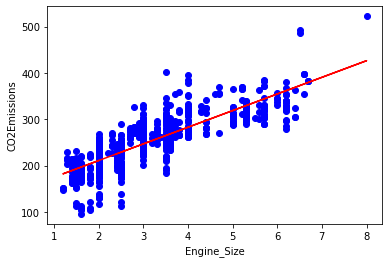

In [14]:
plt.scatter(train.Engine_Size, train.CO2Emissions,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine_Size")
plt.ylabel("CO2Emissions")

In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2Emissions']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 24.20
Residual sum of squares (MSE): 966.61
R2-score: 0.55
